# Glass Identification
### Project Description
##### The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

#### The chemical compositions are measured as the weight percent in corresponding oxide.
#### Attribute Information-
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps

#### There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
#### Predict : Type of glass

#### Dataset Link- https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
df.isna().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [4]:
df.shape

(213, 11)

In [5]:
# change column names 

column_name = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [6]:
df.columns = column_name

In [7]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [8]:
# DROP UNWANTED COLUMNS

df = df.drop(['Id number'], axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [9]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [10]:
df.value_counts().unique()

array([2, 1], dtype=int64)

In [11]:
df['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

There are 6 types of glasses availbale.

In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


1. As per describe data of dataset, available data is not balance or not distributed equaly.
2. There are no nulls present in dataset
3. mean value and std values are not proper in every column. 
4. as per this skewness is availble, but we confirm using visualization.

In [13]:
df.skew()

RI               1.639658
Na               0.457318
Mg              -1.154323
Al               0.900017
Si              -0.744546
K                6.549276
Ca               2.040591
Ba               3.406749
Fe               1.747173
Type of glass    1.108861
dtype: float64

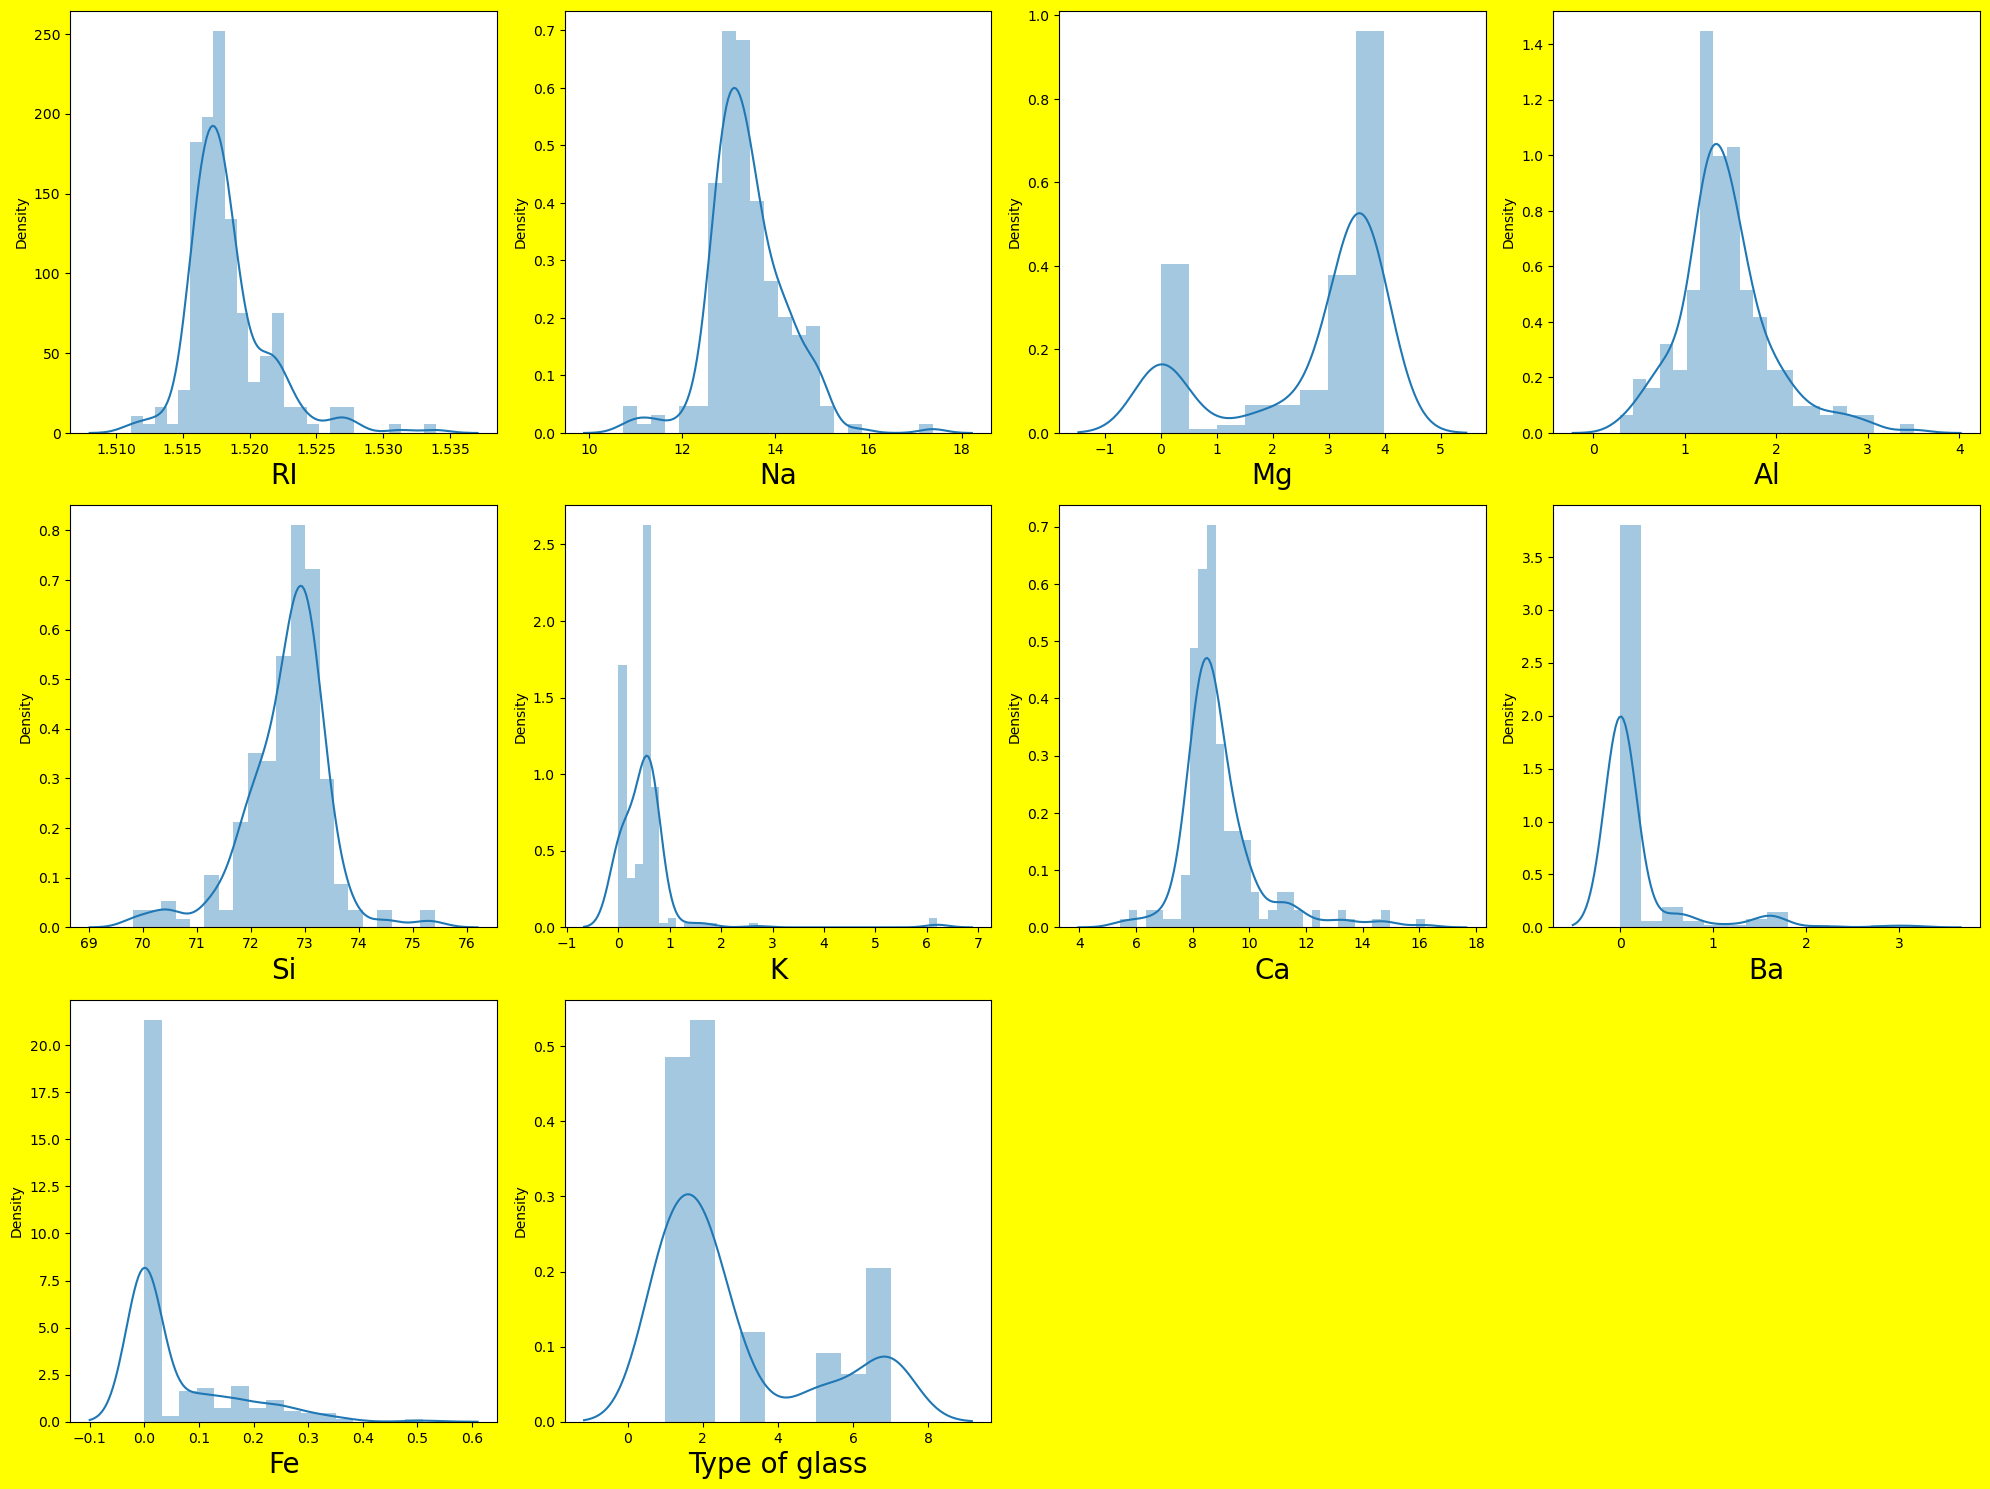

In [14]:
#  let's see how data is distributed for every column.


plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

In [15]:
# K, Ba & Fe columns skewness is availbale.

In [16]:
df_features = df.drop('Type of glass', axis=1)

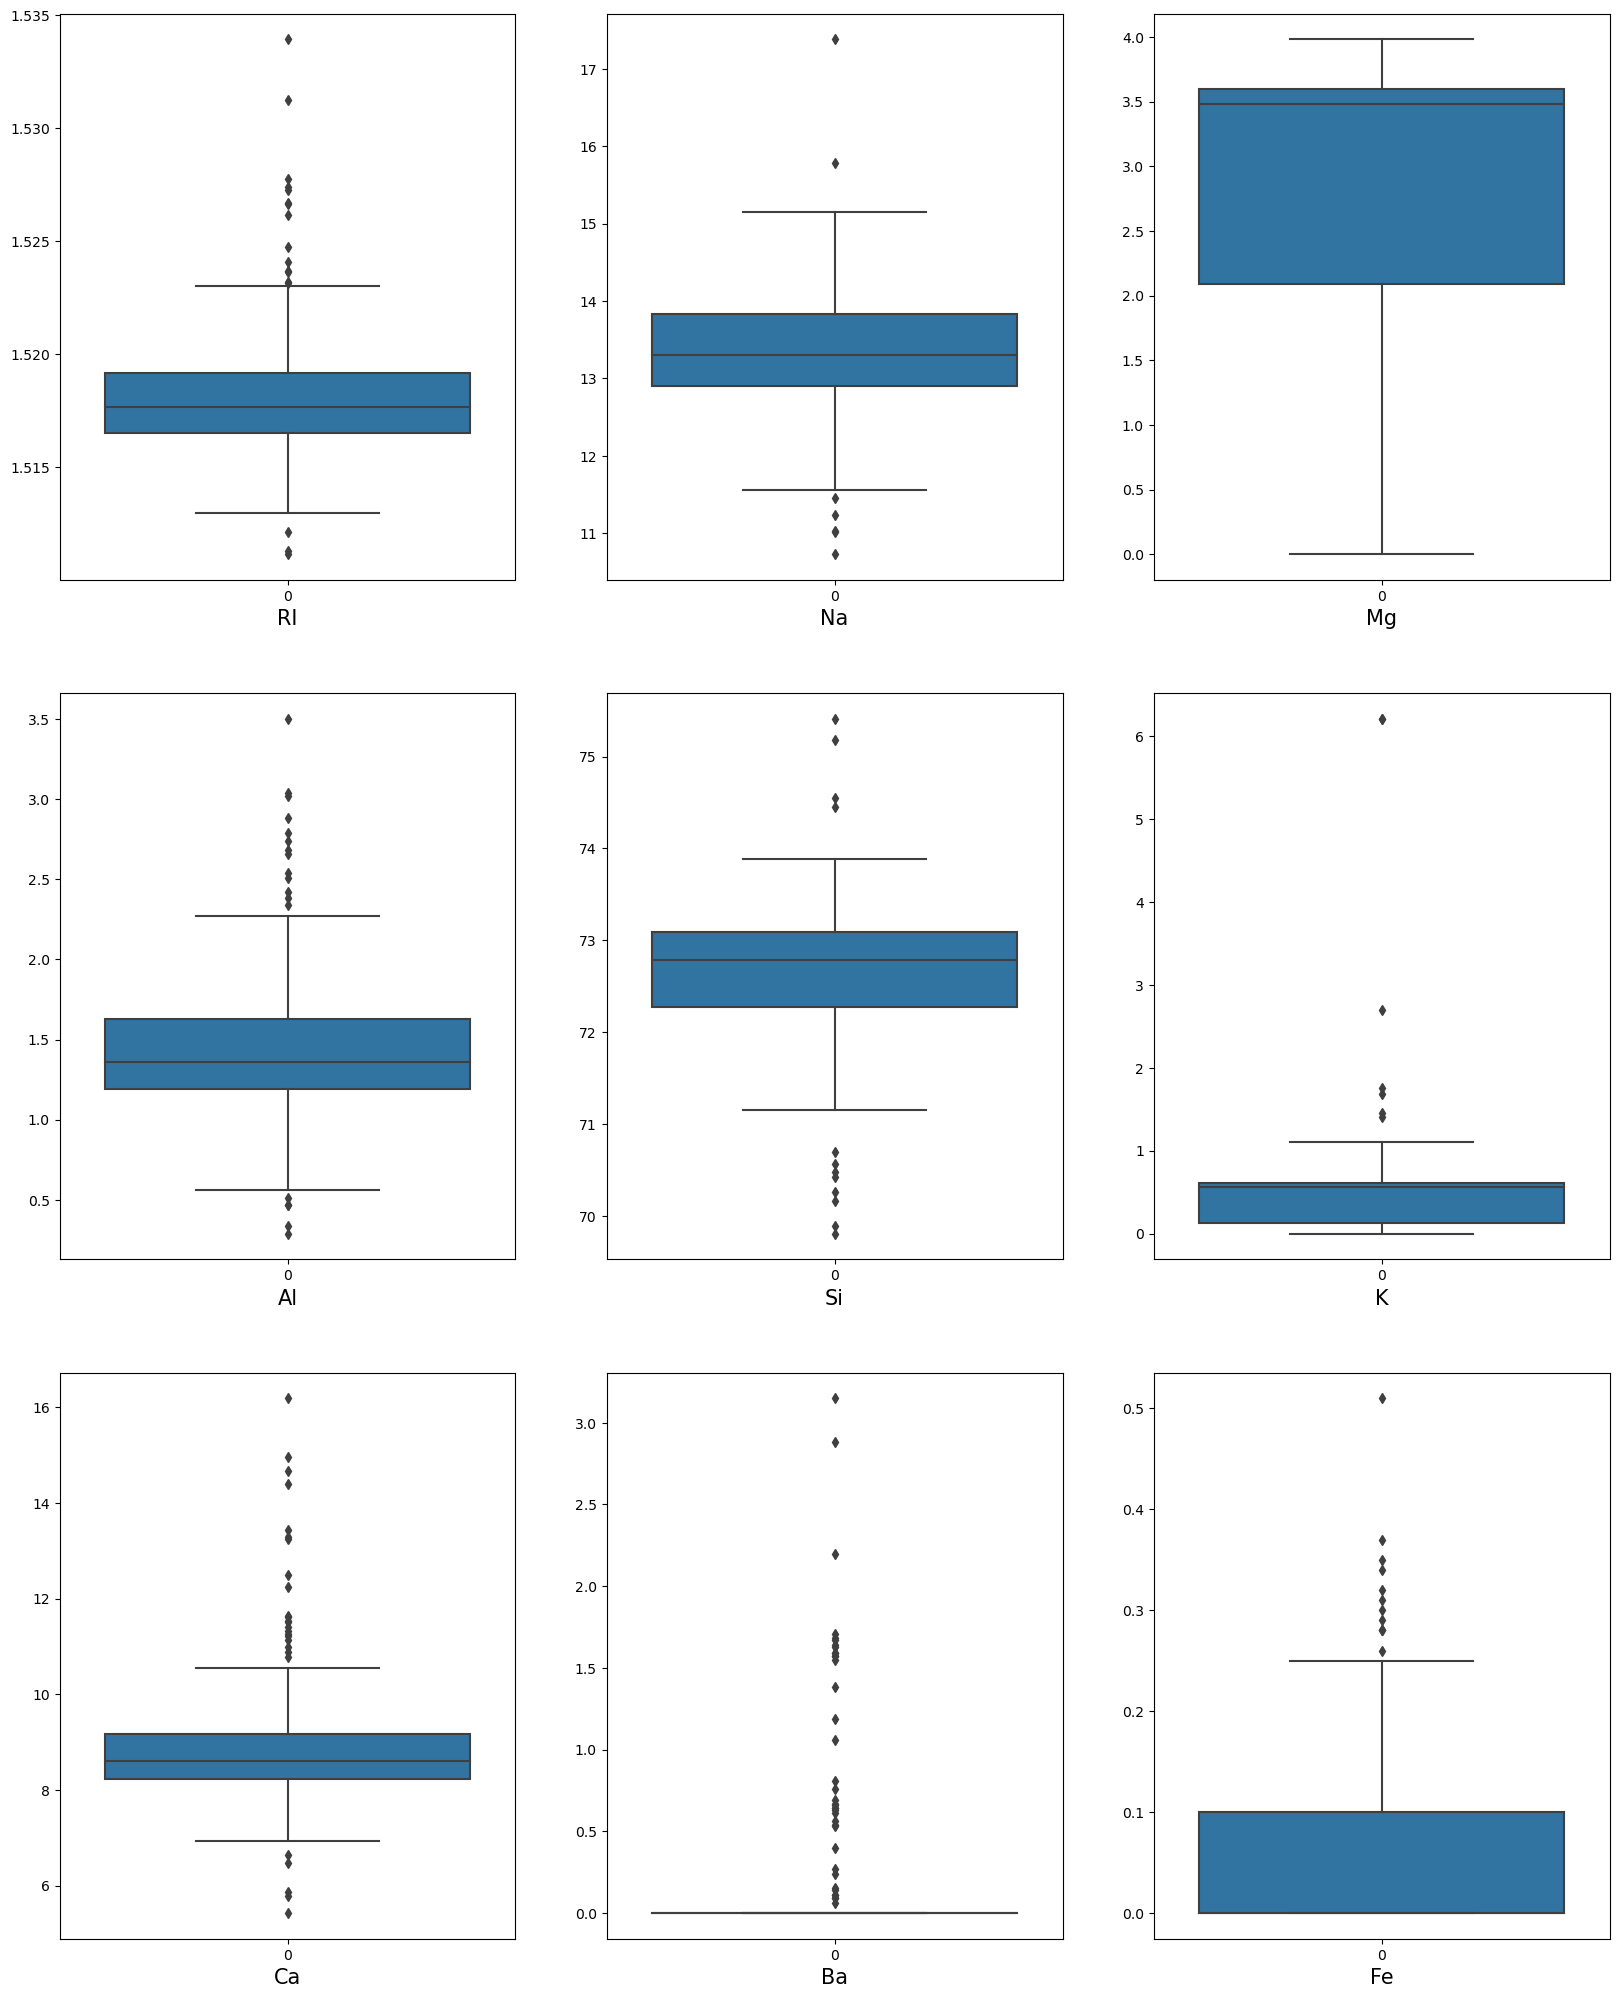

In [17]:
# visualize the outliers using boxplot

plt.figure(figsize =(20,25))
graph = 1

for column in df_features:
    if graph <=9:
        plt.subplot(3,3,graph)
        ax = sns.boxplot(data= df_features[column])
        plt.xlabel(column, fontsize=15)
    graph +=1
plt.show()

In [18]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<Axes: >

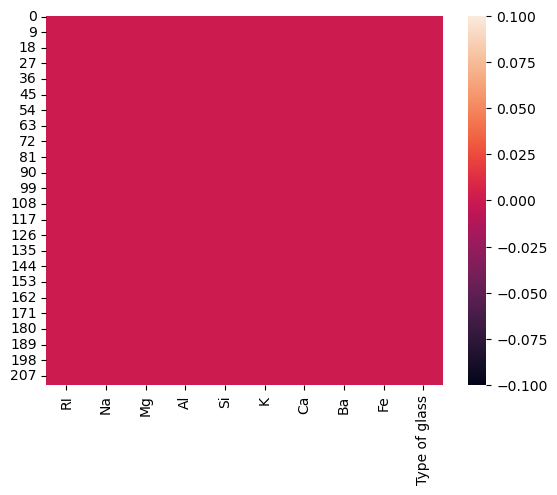

In [20]:
sns.heatmap(df.isna())

In [21]:
df.nunique().to_frame("NO. of unique values")

,NO. of unique values
RI,177
Na,142
Mg,93
Al,117
Si,132
K,65
Ca,143
Ba,34
Fe,32
Type of glass,6


In [22]:
df.skew()

RI               1.639658
Na               0.457318
Mg              -1.154323
Al               0.900017
Si              -0.744546
K                6.549276
Ca               2.040591
Ba               3.406749
Fe               1.747173
Type of glass    1.108861
dtype: float64

## Removing Outliers

In [24]:
#Removing Outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
z
threshold=3
np.where(z>3)

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
        130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
        187, 188, 200, 200, 202, 206, 212], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [25]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(193, 10)

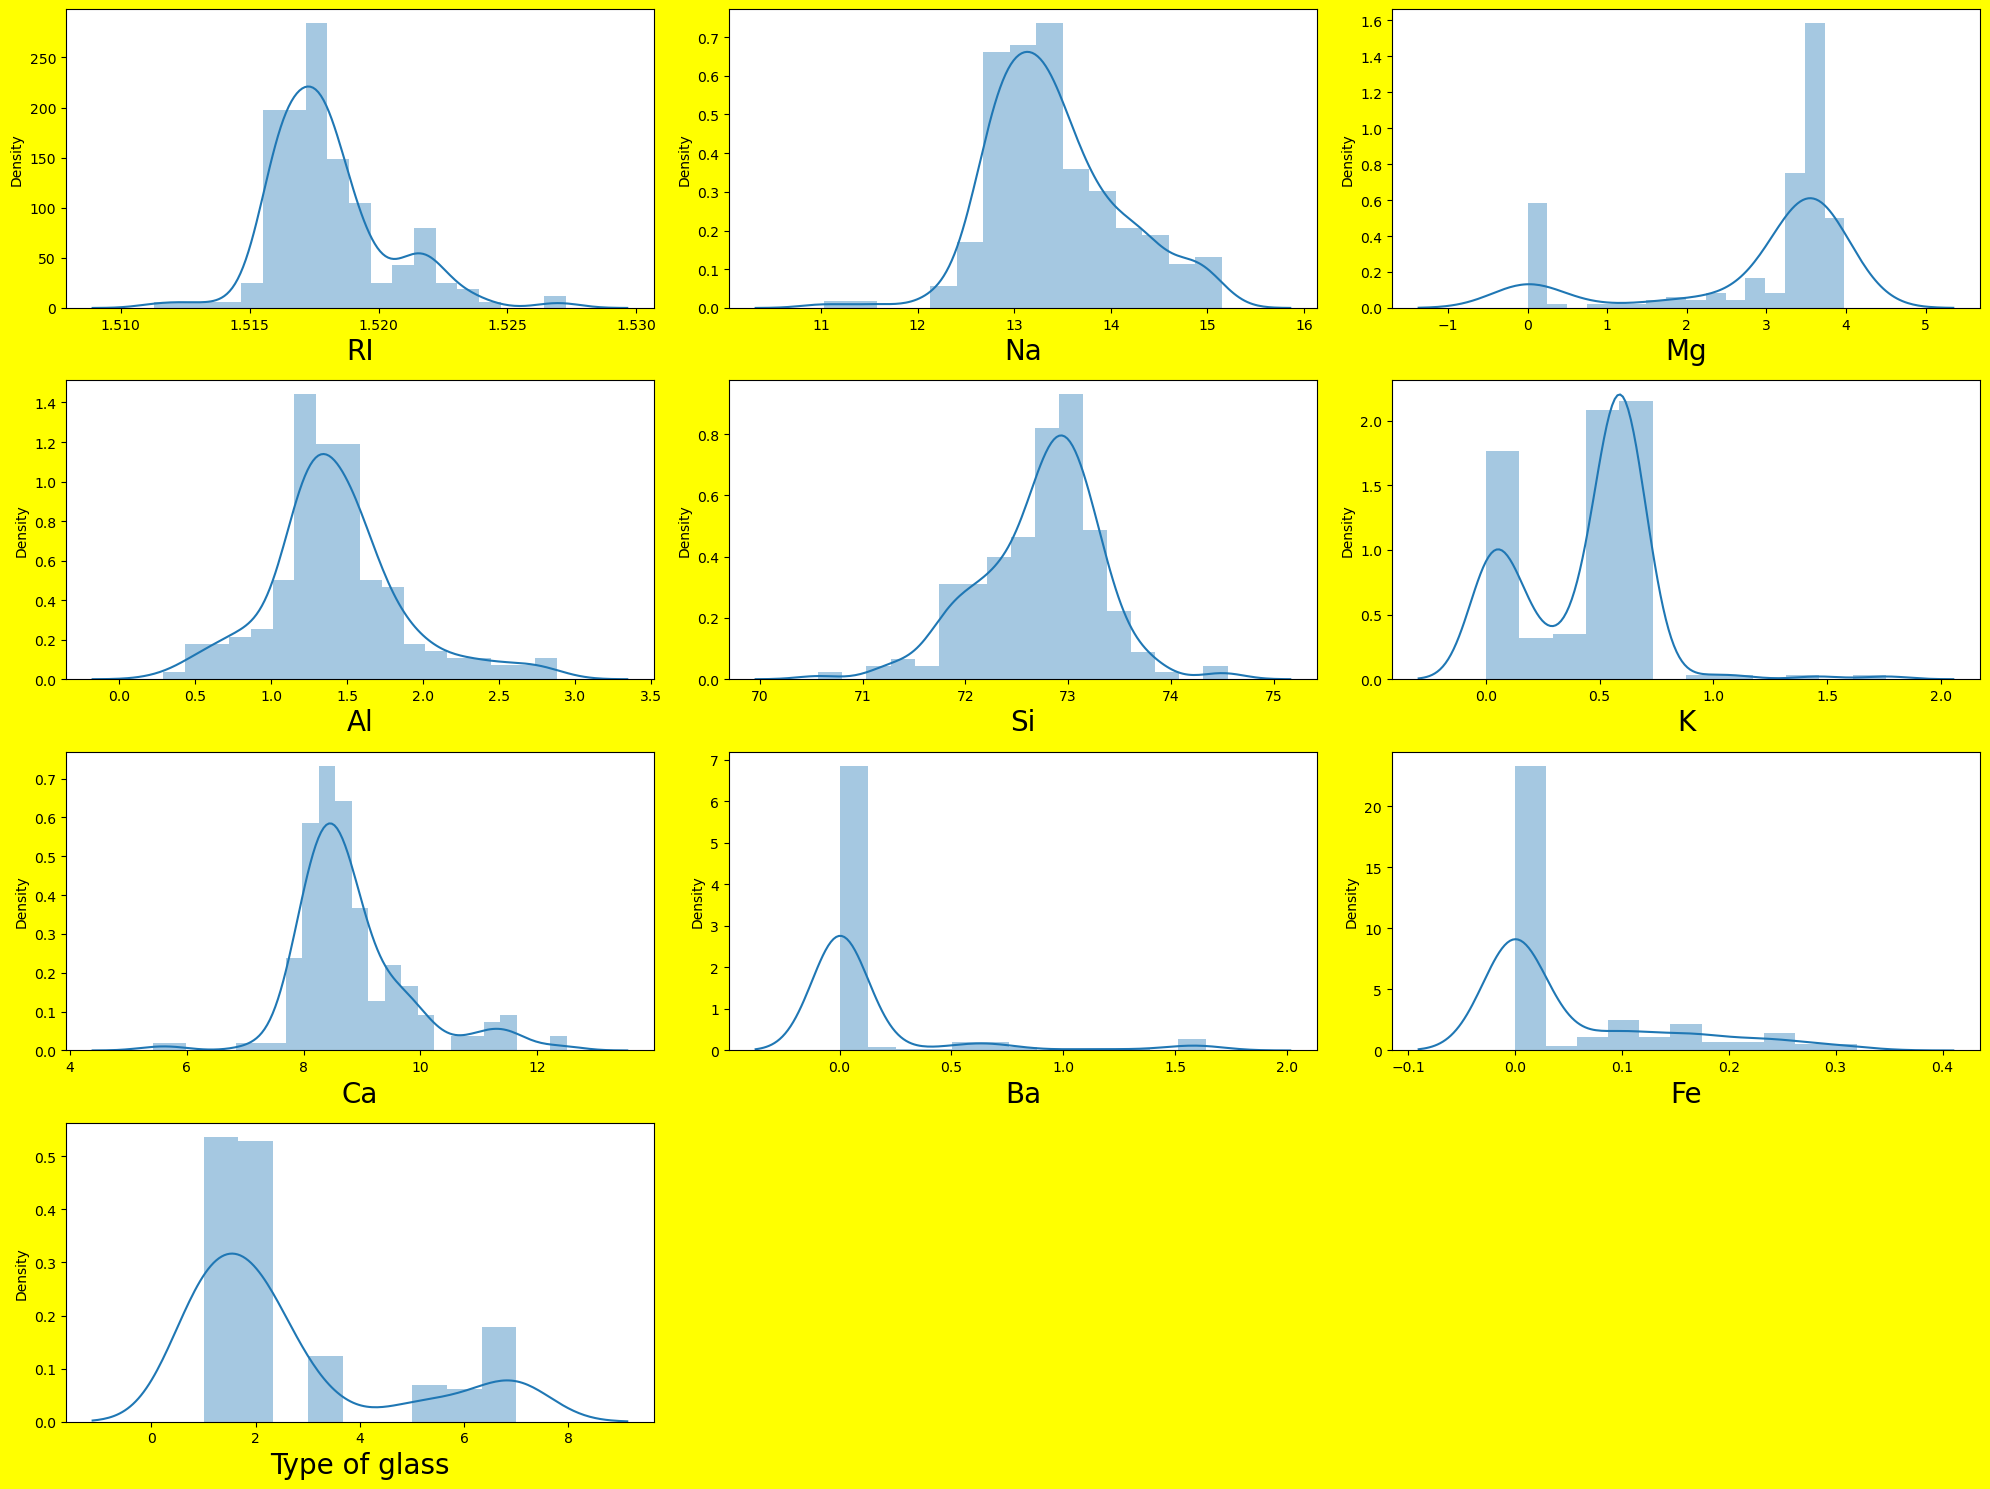

In [26]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in df_new:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

In [27]:
df_new.skew()

RI               0.971729
Na               0.375857
Mg              -1.533664
Al               0.649917
Si              -0.436288
K                0.297900
Ca               1.074092
Ba               3.178256
Fe               1.478611
Type of glass    1.277279
dtype: float64

In [28]:
df_new

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


In [29]:
x = df_new.drop('Type of glass', axis=1)
y =df_new['Type of glass'] 

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.191475,0.704498,0.558738,-0.145324,0.007760,0.165576,-1.005952,-0.347296,-0.605187
1,-0.819092,0.169658,0.520382,0.260836,0.455342,-0.154697,-1.056501,-0.347296,-0.605187
2,-0.169531,-0.305754,0.627781,-0.303276,-0.198816,0.485849,-0.611669,-0.347296,-0.605187
3,-0.274865,-0.216615,0.574081,-0.416098,0.610275,0.414677,-0.763316,-0.347296,-0.605187
4,-0.915648,-0.929734,0.566410,0.441351,0.420913,0.734950,-0.763316,-0.347296,2.428607
...,...,...,...,...,...,...,...,...,...
188,-0.722535,1.417617,-2.202957,2.968571,0.214336,-1.542547,0.631836,1.165248,-0.605187
189,-0.797147,1.075914,-2.202957,3.284473,-0.198816,-1.257860,0.358872,2.621773,-0.605187
190,-0.525034,2.234732,-2.202957,1.276236,0.575845,-1.542547,-0.429693,4.106307,-0.605187
191,1.142758,1.402760,-2.202957,1.343930,1.195574,-1.542547,-0.389254,4.246358,-0.605187


In [31]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [32]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.30, random_state = 340)
RFR = RandomForestClassifier()
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test, pred)

print("Best accuracy is ", acc)

Best accuracy is  0.7586206896551724


In [33]:
# checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.7586206896551724
[[17  0  0  0  0  0]
 [ 5 13  0  2  0  0]
 [ 1  1  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 1  0  0  2  2  0]
 [ 1  0  0  0  0  7]]
              precision    recall  f1-score   support

           1       0.68      1.00      0.81        17
           2       0.87      0.65      0.74        20
           3       1.00      0.50      0.67         4
           5       0.43      0.75      0.55         4
           6       1.00      0.40      0.57         5
           7       1.00      0.88      0.93         8

    accuracy                           0.76        58
   macro avg       0.83      0.70      0.71        58
weighted avg       0.82      0.76      0.76        58



In [34]:
# checking accuracy for ExtraTreesClassifier

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7758620689655172
[[16  1  0  0  0  0]
 [ 3 14  0  3  0  0]
 [ 2  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  2  3  0]
 [ 1  0  0  0  0  7]]
              precision    recall  f1-score   support

           1       0.73      0.94      0.82        17
           2       0.88      0.70      0.78        20
           3       1.00      0.50      0.67         4
           5       0.38      0.75      0.50         4
           6       1.00      0.60      0.75         5
           7       1.00      0.88      0.93         8

    accuracy                           0.78        58
   macro avg       0.83      0.73      0.74        58
weighted avg       0.83      0.78      0.78        58



In [35]:
# checking accuracy for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test, predDT))

0.6551724137931034
[[15  1  0  0  0  1]
 [ 4 13  0  1  2  0]
 [ 1  2  1  0  0  0]
 [ 0  3  0  1  0  0]
 [ 1  1  0  2  1  0]
 [ 1  0  0  0  0  7]]
              precision    recall  f1-score   support

           1       0.68      0.88      0.77        17
           2       0.65      0.65      0.65        20
           3       1.00      0.25      0.40         4
           5       0.25      0.25      0.25         4
           6       0.33      0.20      0.25         5
           7       0.88      0.88      0.88         8

    accuracy                           0.66        58
   macro avg       0.63      0.52      0.53        58
weighted avg       0.66      0.66      0.64        58



# USE HYPERPARAMETER TUNNING

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=340)

In [37]:
# write one fuction and call as many as times to check accuracy_score of different models.

def metric_score (clf, x_train, x_test, y_train, y_test, train = True ):
    if train :
        y_pred = clf.predict(x_train)
        
        print("\n ____________TRAIN RESULT______________")
        
        print(f"Accuracy Score : {accuracy_score (y_train, y_pred) * 100:.2f}%")
   
    
    elif train == False:
        
        pred = clf.predict(x_test)
 
        print("\n ____________TEST RESULT______________")
        
        print(f"Accuracy Score : {accuracy_score (y_test, pred) * 100:.2f}%")
    
        print('\n\n TEST CLASSIFICATION REPORT\n', classification_report(y_test, pred, digits=2))  #model confidence/accuracy
    

In [38]:
# model initiation

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
# We are tunnig four Imortant Hyperparameters right now, we are passing the different values for both parameters.

param_grid = {
            'criterion':['gini','entropy'],    
            'max_depth': range(15,20),         
            'min_samples_leaf': range(3,5),    
            'min_samples_split': range(4,8),    
            'max_leaf_nodes': range(30,80)      
}     

In [40]:
gridsearch = GridSearchCV(estimator = clf, 
                           param_grid= param_grid,  
                           cv=5, 
                           n_jobs = -1)

In [41]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(15, 20),
                         'max_leaf_nodes': range(30, 80),
                         'min_samples_leaf': range(3, 5),
                         'min_samples_split': range(4, 8)})

In [42]:
best_parameters = gridsearch.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 17, 'max_leaf_nodes': 38, 'min_samples_leaf': 3, 'min_samples_split': 4}


In [43]:
DTC = DecisionTreeClassifier(criterion = 'gini', max_depth = 17,
                               max_leaf_nodes = 38, min_samples_leaf= 3,
                               min_samples_split= 4)

DTC.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=17, max_leaf_nodes=38, min_samples_leaf=3,
                       min_samples_split=4)

In [44]:
metric_score (DTC, x_train, x_test, y_train, y_test, train = True)

metric_score (DTC, x_train, x_test, y_train, y_test, train = False)


 ____________TRAIN RESULT______________
Accuracy Score : 92.36%

 ____________TEST RESULT______________
Accuracy Score : 61.22%


 TEST CLASSIFICATION REPORT
               precision    recall  f1-score   support

           1       0.61      0.93      0.74        15
           2       0.80      0.47      0.59        17
           3       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         3
           6       0.17      0.25      0.20         4
           7       0.86      0.86      0.86         7

    accuracy                           0.61        49
   macro avg       0.49      0.47      0.46        49
weighted avg       0.63      0.61      0.59        49



In [45]:
y_pred = DTC.predict(x_test)

cfm = confusion_matrix(y_test, y_pred)

cfm

array([[14,  0,  0,  0,  0,  1],
       [ 6,  8,  1,  0,  2,  0],
       [ 1,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 1,  1,  0,  1,  1,  0],
       [ 1,  0,  0,  0,  0,  6]], dtype=int64)

In [46]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.7755102040816326
[[14  1  0  0  0  0]
 [ 4 13  0  0  0  0]
 [ 1  1  1  0  0  0]
 [ 0  1  0  2  0  0]
 [ 1  1  0  0  2  0]
 [ 1  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.67      0.93      0.78        15
           2       0.76      0.76      0.76        17
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         4
           7       1.00      0.86      0.92         7

    accuracy                           0.78        49
   macro avg       0.91      0.68      0.74        49
weighted avg       0.82      0.78      0.77        49



In [47]:
# checking accuracy for ExtraTreesClassifier

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7346938775510204
[[14  1  0  0  0  0]
 [ 4 12  0  1  0  0]
 [ 2  0  1  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  2  1]
 [ 1  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.67      0.93      0.78        15
           2       0.75      0.71      0.73        17
           3       1.00      0.33      0.50         3
           5       0.50      0.33      0.40         3
           6       1.00      0.50      0.67         4
           7       0.86      0.86      0.86         7

    accuracy                           0.73        49
   macro avg       0.80      0.61      0.65        49
weighted avg       0.76      0.73      0.72        49



In [48]:
# model after tunning parameters
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predET = GBC.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7142857142857143
[[14  0  0  0  0  1]
 [ 4 10  2  1  0  0]
 [ 1  1  1  0  0  0]
 [ 1  0  0  2  0  0]
 [ 0  2  0  0  2  0]
 [ 1  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.67      0.93      0.78        15
           2       0.77      0.59      0.67        17
           3       0.33      0.33      0.33         3
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         4
           7       0.86      0.86      0.86         7

    accuracy                           0.71        49
   macro avg       0.72      0.65      0.66        49
weighted avg       0.74      0.71      0.71        49



In [62]:
# model after tunning parameters
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predET = ABC.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.4489795918367347
[[16  1  0  0  1]
 [19  2  0  0  0]
 [ 4  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

           1       0.41      0.89      0.56        18
           2       0.40      0.10      0.15        21
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           7       0.80      1.00      0.89         4

    accuracy                           0.45        49
   macro avg       0.32      0.40      0.32        49
weighted avg       0.39      0.45      0.34        49



In [49]:
# model after tunning parameters
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predET = BC.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7551020408163265
[[12  1  1  0  0  1]
 [ 3 14  0  0  0  0]
 [ 2  0  1  0  0  0]
 [ 0  1  0  2  0  0]
 [ 1  1  0  0  2  0]
 [ 1  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.63      0.80      0.71        15
           2       0.82      0.82      0.82        17
           3       0.50      0.33      0.40         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         4
           7       0.86      0.86      0.86         7

    accuracy                           0.76        49
   macro avg       0.80      0.66      0.71        49
weighted avg       0.77      0.76      0.75        49



In [50]:
# model after tunning parameters
svc = SVC()
svc.fit(x_train, y_train)
predET = svc.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7346938775510204
[[13  2  0  0  0  0]
 [ 3 13  0  1  0  0]
 [ 2  1  0  0  0  0]
 [ 1  0  0  2  0  0]
 [ 1  1  0  0  2  0]
 [ 1  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.62      0.87      0.72        15
           2       0.76      0.76      0.76        17
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       1.00      0.50      0.67         4
           7       1.00      0.86      0.92         7

    accuracy                           0.73        49
   macro avg       0.68      0.61      0.62        49
weighted avg       0.72      0.73      0.71        49



In [52]:
# checking accuracy for ExtraTreesClassifier

final = RandomForestClassifier()
final.fit(x_train, y_train)
pred = final.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.7755102040816326
[[14  1  0  0  0  0]
 [ 4 13  0  0  0  0]
 [ 2  0  1  0  0  0]
 [ 0  1  0  2  0  0]
 [ 1  1  0  0  2  0]
 [ 1  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.64      0.93      0.76        15
           2       0.81      0.76      0.79        17
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         4
           7       1.00      0.86      0.92         7

    accuracy                           0.78        49
   macro avg       0.91      0.68      0.74        49
weighted avg       0.82      0.78      0.77        49



### By using RandomForestClassifier we get best accuracy score for glass identification dataset.

In [54]:
from pickle import dump
dump(final,open('glassidentification.pkl','wb'))

In [55]:
import pickle
loaded_model = pickle.load(open('glassidentification.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

77.55102040816327


In [56]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
Predicted,3,7,1,5,2,1,1,2,1,2,...,6,6,1,1,1,1,2,1,2,1
Original,3,7,1,5,2,1,6,2,3,2,...,6,6,1,1,1,2,2,1,2,2
